# Problem Statement and Business Case

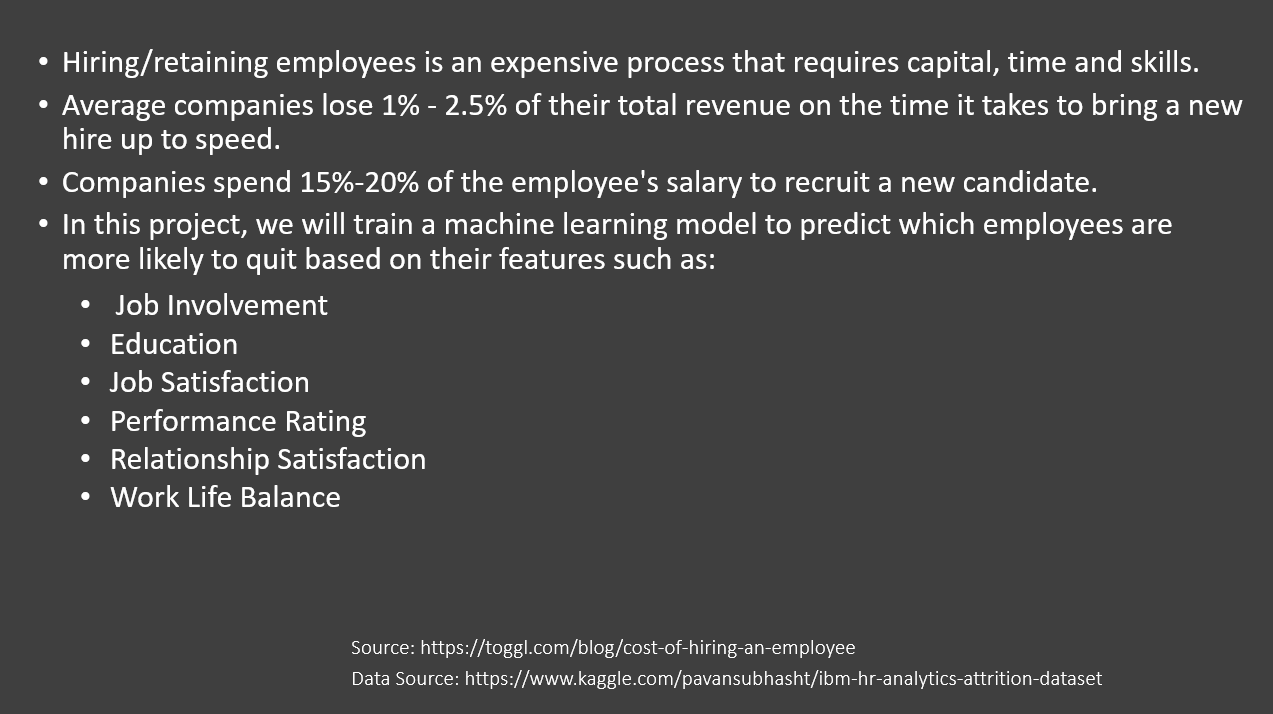

#### Predict which employees are likely to quit using Machine Learning.

In [1]:
#Target variable is attrition

# Import basic libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset 

In [3]:
df= pd.read_csv(r'C:\Users\PurvaRaut\Desktop\DataAnalytics\6.Python\Coursera_Employee_Attrition_Prediction_Using_Machine_Learning\employee_data.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape
#df has 1470 rows and 35 columns

(1470, 35)

In [6]:
#df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#check for nulls
df.isna().sum()
#no nulls

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#Statistical summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Cleaning

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df['Attrition'].head()
#check all the columns one by one.

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [11]:
df['OverTime'].head()

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: OverTime, dtype: object

In [12]:
df['Over18'].head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: Over18, dtype: object

In [13]:
# Let's replace the 'Attritition', 'overtime', and 'Over18' column with integers before performing any visualizations
df['Attrition']=df['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
df['OverTime']=df['OverTime'].apply(lambda x:1 if x=='Yes' else 0)
df['Over18']=df['Over18'].apply(lambda x:1 if x=='Y' else 0)

In [14]:
# Let's make sure that the replacement worked
df['Over18'].unique()
#all employees are above 18

array([1], dtype=int64)

In [15]:
df['Attrition'].unique()

array([1, 0], dtype=int64)

In [16]:
df['OverTime'].unique()

array([1, 0], dtype=int64)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

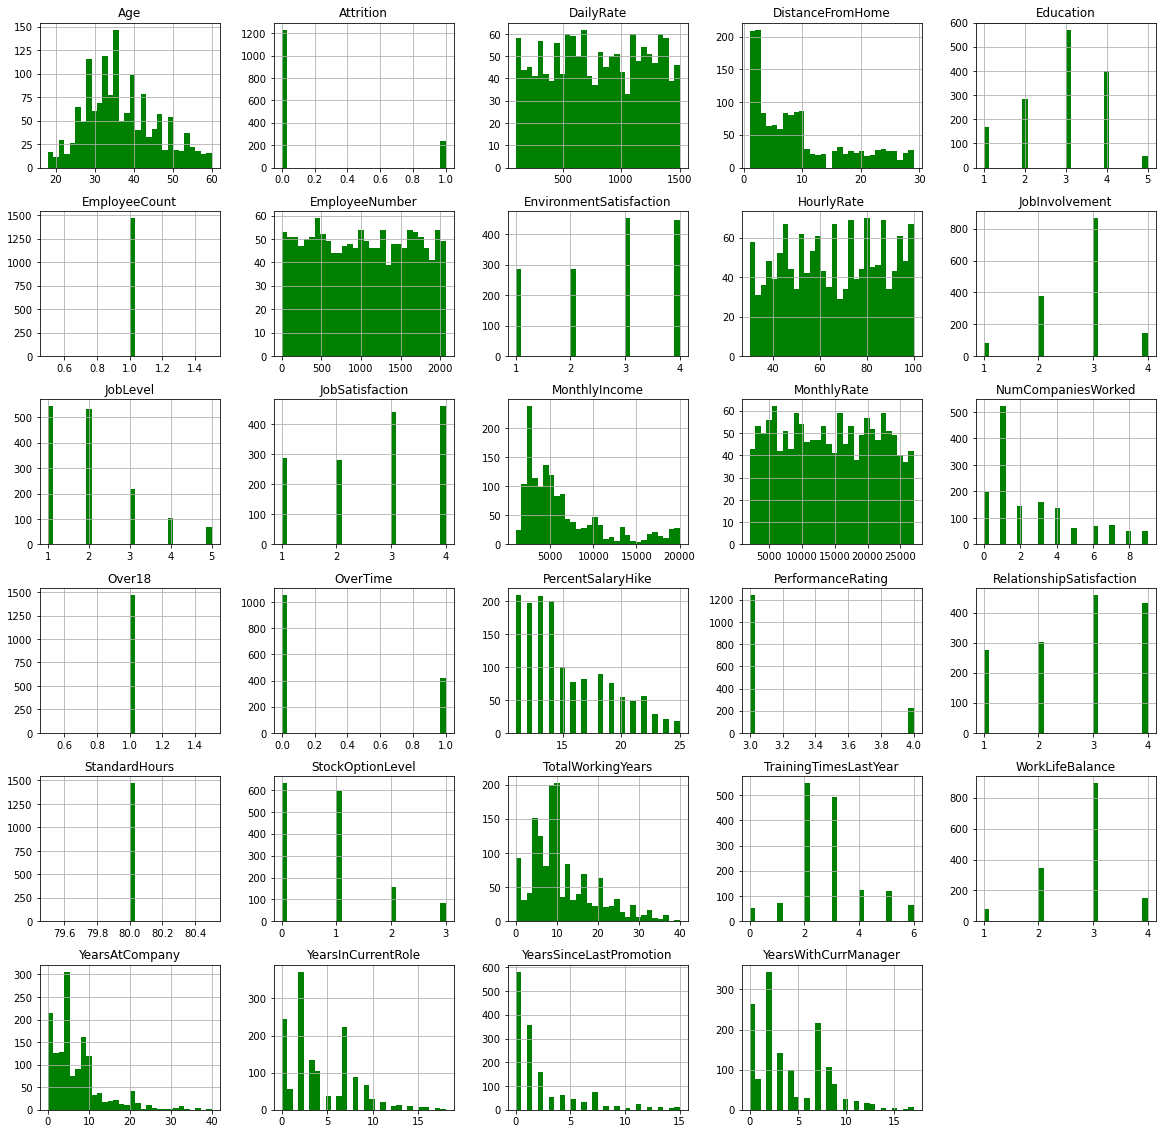

In [17]:
#lets plot histogram for all the features
df.hist(bins=30, figsize=(20,20), color='g')

In [18]:
# Frequency of 'DistanceFromHome' is more when the distance is shorter
#'Monthly income' is tail heavy at less monthly income
#'TotalWorking Years' is tail heavy at less total working years
#'YearsAt Company' is tail heavy at less years at the company

In [19]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Analysis based upon the target variable 'Attrition' 

In [21]:
#create new dfs to categorize employees who left and those who stayed
left_df        = df[df['Attrition'] == 1]
stayed_df      = df[df['Attrition'] == 0]

In [22]:
stayed_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [23]:
left_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,...,3,1,1,1,3,2,1,0,1,0
1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,...,3,2,3,4,3,4,2,2,2,2
1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,3,4,1,14,4,1,10,9,9,8
1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,...,3,4,2,12,3,3,6,3,0,1


In [24]:
#compare both the dataframes by its statistical summary

In [25]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [26]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [27]:
# Let's compare the mean of the employees who stayed and left 
# 'age': mean age of the employees who stayed(38) is higher compared to who left(34)
# 'DailyRate': mean Rate of employees who stayed(812.50) is higher than who left(750.36)
# 'DistanceFromHome': Employees who stayed(8.91) live closer to home than employees who left(10.63)
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs(2.7,2.7)compared to (2.5,2.4)
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level(0.84) compared to (0.52)

In [28]:
# Lets find correlation between the features
corr_matrix=df.corr().round(2)
corr_matrix

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,-0.16,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
Attrition,-0.16,1.00,-0.06,0.08,-0.03,-0.10,-0.01,-0.13,-0.17,-0.10,...,0.00,-0.05,-0.14,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16
DailyRate,0.01,-0.06,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,0.08,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.03,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,-0.10,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,-0.01,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,...,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,-0.13,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,...,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,-0.17,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,...,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,-0.10,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,...,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03


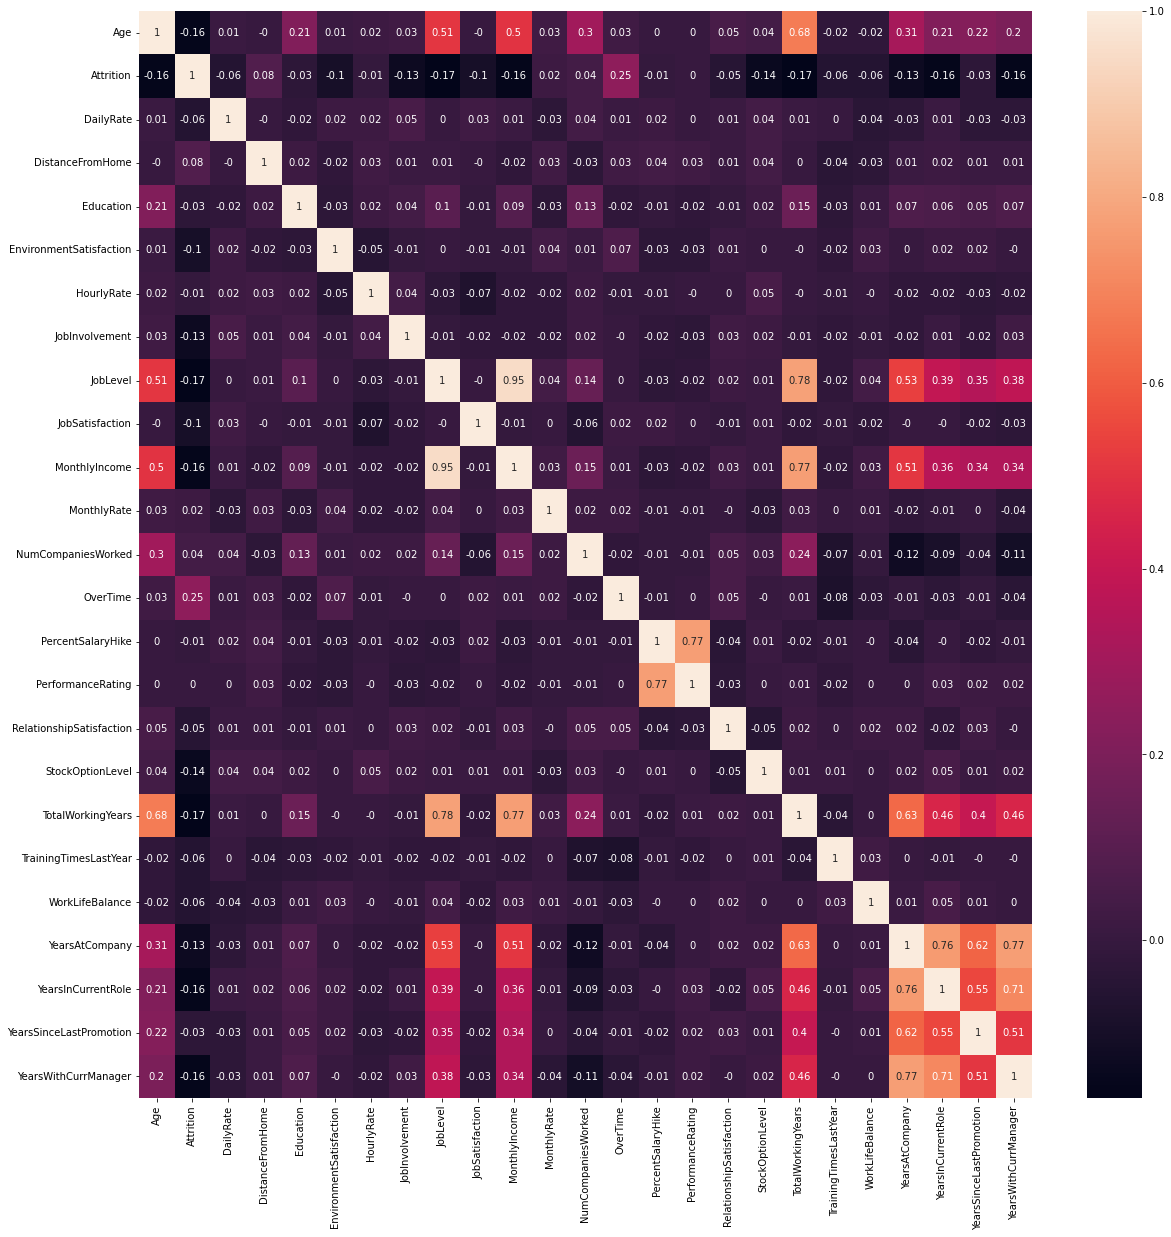

In [29]:
#Lets visualise the correlation matrix using the heatmap
plt.figure(figsize=(20,20))
plot=sns.heatmap(corr_matrix,annot=True)

In [30]:
#Strong correlation is observed between 'Monthlyincome' and 'JobLevel'
#Good positive correlation is observed between 'Joblevel' and 'TotalWorkingYears'
#Good positive correlation is observed between 'MonthlyIncome' and 'TotalWorkingYears'
#Good positive correlation is observed between 'PercentSalaryHike' and 'PerformanceRating'
#Good positive correlation is observed between 'YearsAtCompany' and 'YearsInCurrentRole'
#Good positive correlation is observed between 'YearsAtCompany' and 'YearsWithCurrManager'
#Good positive correlation is observed between 'YearsWithCurrManager' and 'YearsInCurrentRole'

In [31]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [32]:
#check all the features and select categorical and less than 10
df['NumCompaniesWorked'].nunique()

10

In [33]:
#Visualising the categorical variables with th target variable
#categorical features

In [34]:
#Make a copy of the dataframe
emp_df=df.copy()

In [35]:
#Reconverted Attrition 1 to Yes and 0 to No for better visualisation
emp_df['Attrition']=emp_df['Attrition'].apply(lambda x:'Yes' if x==1 else 'No')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

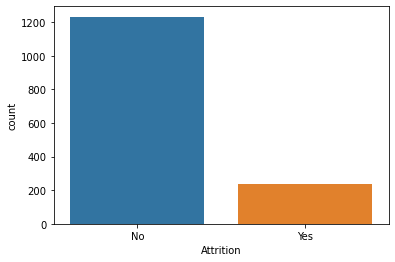

In [36]:
sns.countplot(x=emp_df['Attrition'],order=emp_df['Attrition'].value_counts().index)

In [37]:
#As the class is imbalanced that attrition-No is greater attrition-Yes,it will be difficult to compare and draw conclusions based on the absolute values alone.
#Hence,I decided to convert the countplots to percentage to draw insights better

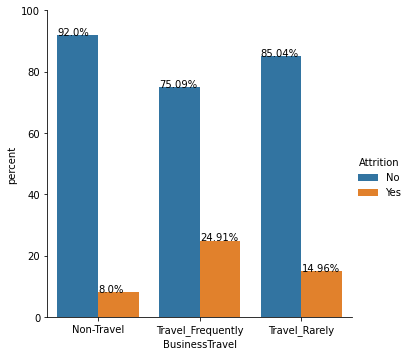

In [38]:
#1.BusinessTravel
x,y = 'BusinessTravel', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [39]:
#Frequent business travel could be the reason for attrition

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

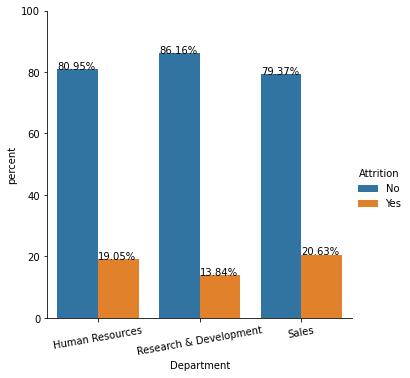

In [40]:
#2.Department
x,y = 'Department', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xticks(rotation=10)

In [41]:
# Department doesn't seem to be a strong indicator for attrition

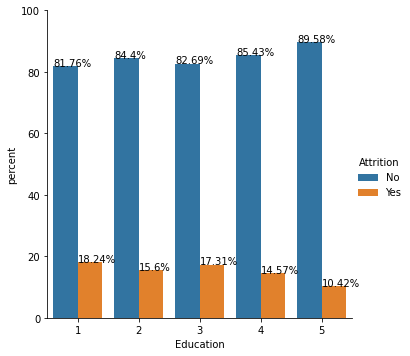

In [42]:
#3.Education
x,y = 'Education', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [43]:
# Education doesn't seem to be a strong indicator for attrition

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Life Sciences'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Medical'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Technical Degree')])

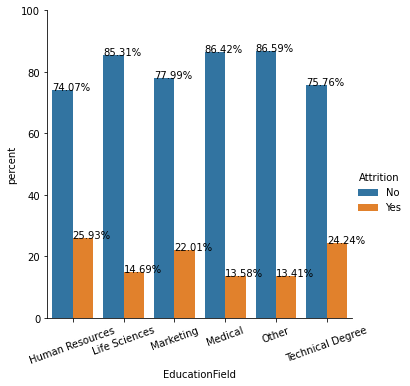

In [44]:
#4.EducationField
x,y = 'EducationField', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xticks(rotation=20)

In [45]:
# Education field doesn't seem to be a strong indicator for attrition

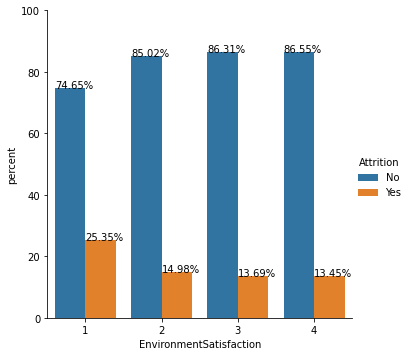

In [46]:
#5.EnvironmentSatisfaction
x,y = 'EnvironmentSatisfaction', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [47]:
#Employees least satisfied with their environment show more attrition rate

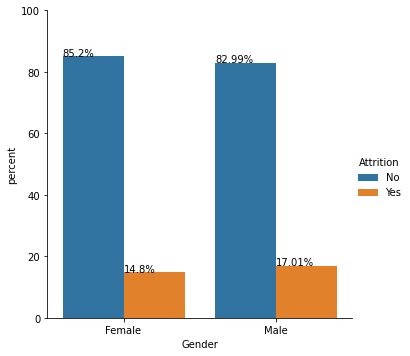

In [48]:
#6.Gender
x,y = 'Gender', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [49]:
# Gender doesn't seem to be a strong indicator for attrition

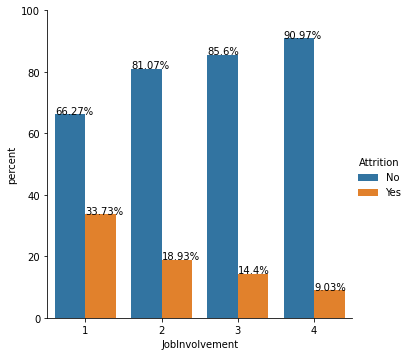

In [50]:
#7.JobInvolvement
x,y = 'JobInvolvement', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [51]:
#Employees with the least Job Involvement show more attrition rate

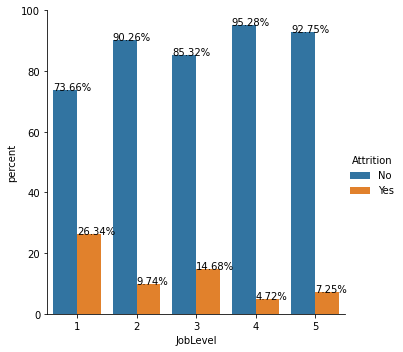

In [52]:
#8.JobLevel
x,y = 'JobLevel', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [53]:
#Employees with the least Job Level show more attrition rate

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

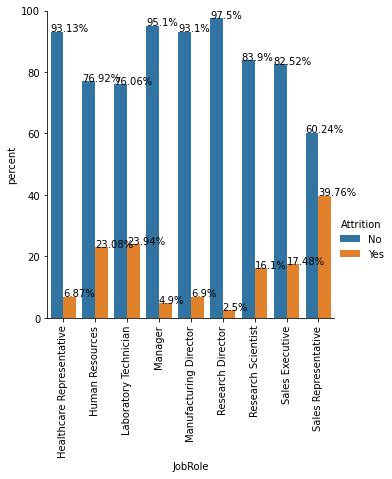

In [54]:
#9.JobRole
x,y = 'JobRole', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xticks(rotation=90)

In [55]:
#Sales Representatives show a higher attrition rate

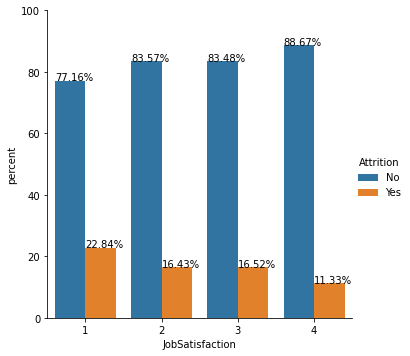

In [56]:
#10.JobSatisfaction
x,y = 'JobSatisfaction', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [57]:
#Employees with the least Job Satisfaction show more attrition rate

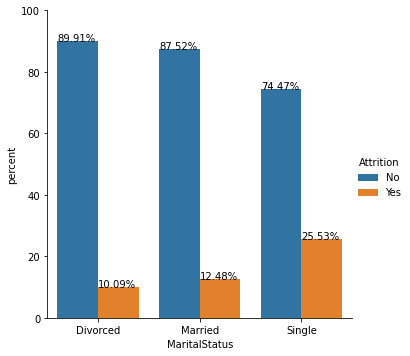

In [58]:
#11.MaritalStatus
x,y = 'MaritalStatus', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [59]:
#Single employees tend to have a greater attrition rate

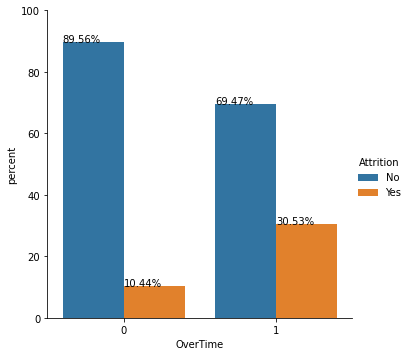

In [60]:
#12.OverTime
x,y = 'OverTime', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [61]:
#Employees who work OverTime tend to have highere attrition rate

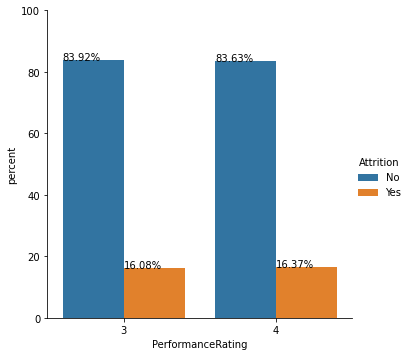

In [62]:
#13.PerformanceRating
x,y = 'PerformanceRating', 'Attrition'

df9 = emp_df.groupby(x)[y].value_counts(normalize=True)
df9 = df9.mul(100)
df9 = df9.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df9)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [63]:
# PerformanceRating doesn't seem to be a strong indicator for attrition

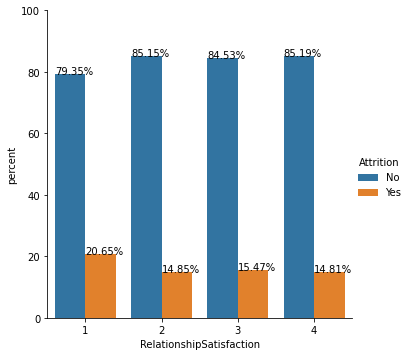

In [64]:
#14.RelationshipSatisfaction
x,y = 'RelationshipSatisfaction', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [65]:
#Employees with the least RelationshipSatisfaction show sightly more attrition rate

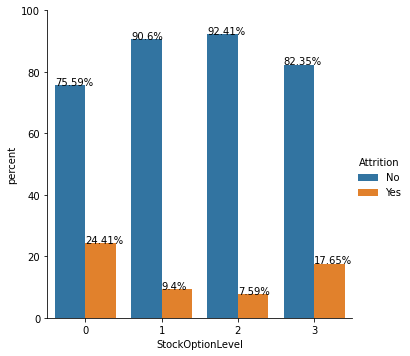

In [66]:
#15.StockOptionLevel
x,y = 'StockOptionLevel', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [67]:
#Employees with least and more stock option level tend to have a greater attrition rate

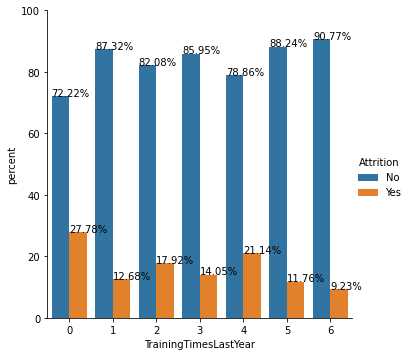

In [68]:
#16.TrainingTimesLastYear
x,y = 'TrainingTimesLastYear', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [69]:
#TrainingTimesLastYear doesn't seem to be a strong indicator of attrition

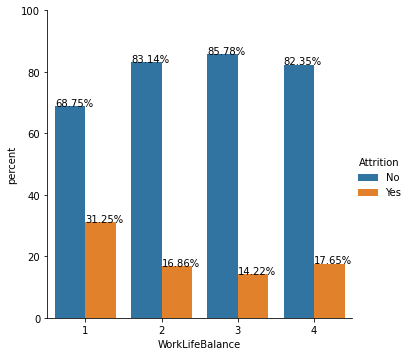

In [70]:
#17.WorkLifeBalance
x,y = 'WorkLifeBalance', 'Attrition'

df1 = emp_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [71]:
#Employees with the least work life balance show the highest attrition rate

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

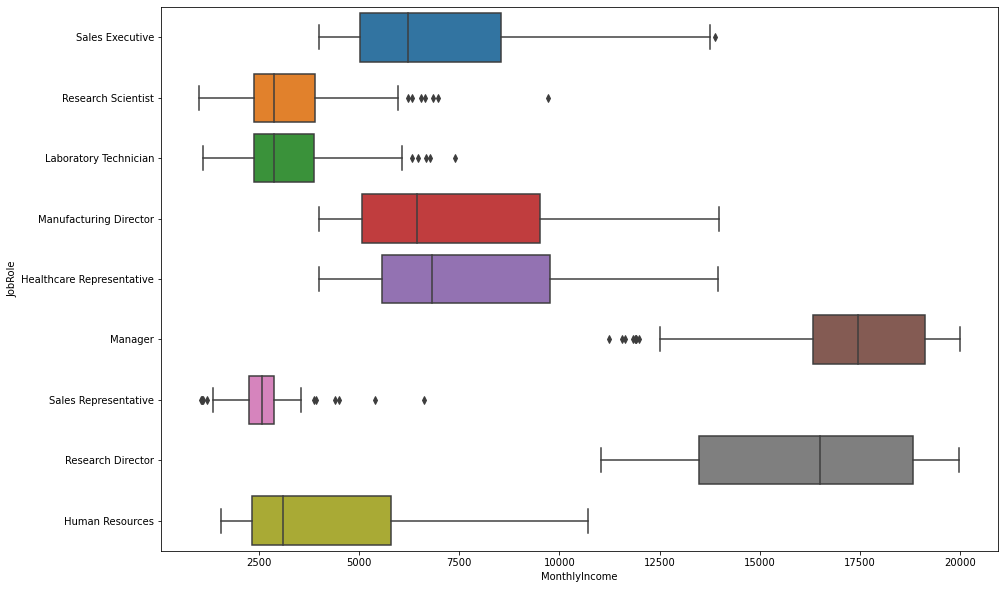

In [72]:
# Let's see the monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=df)

In [73]:
#Employees in the role of Research Director and Manager have higher Monthly income as compared to others.

# Working on Continuous variables

In [74]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

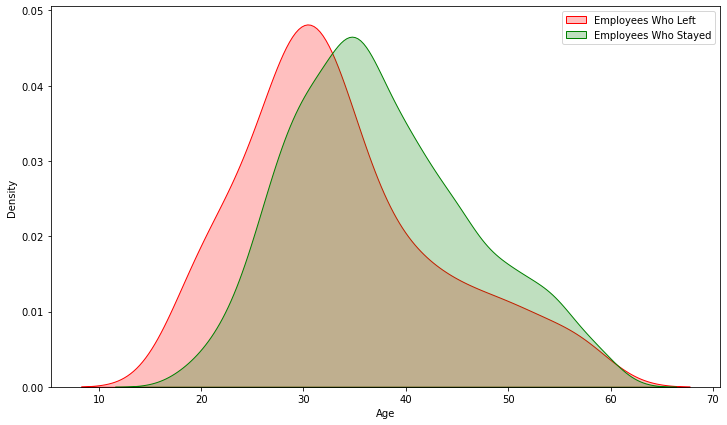

In [75]:
#Age
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['Age'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['Age'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [76]:
# As age increases the number of people left tend to be lower compared to the no. of people who stayed.

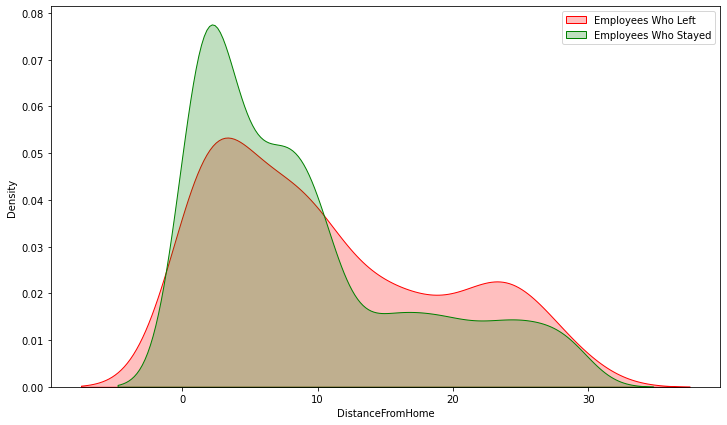

In [77]:
#DistanceFromHome
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [78]:
# As distance from home increases the number of people left tend to be higher compared to the no. of people who stayed.

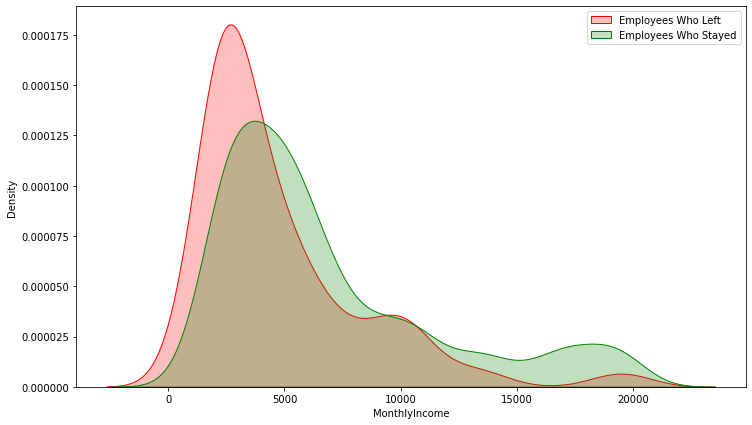

In [79]:
#MonthlyIncome
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['MonthlyIncome'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['MonthlyIncome'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [80]:
# As Monthly Income increases the number of people left tend to be lower compared to the no. of people who stayed.

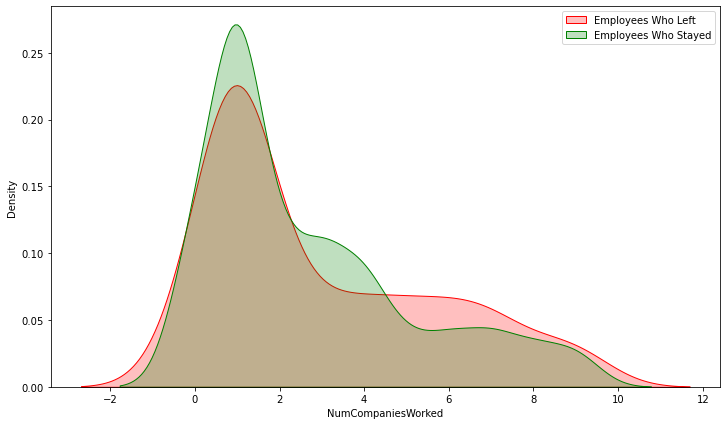

In [81]:
#NumCompaniesWorked
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['NumCompaniesWorked'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['NumCompaniesWorked'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [82]:
# As num of companies worked are higher, higher is the attrition rate

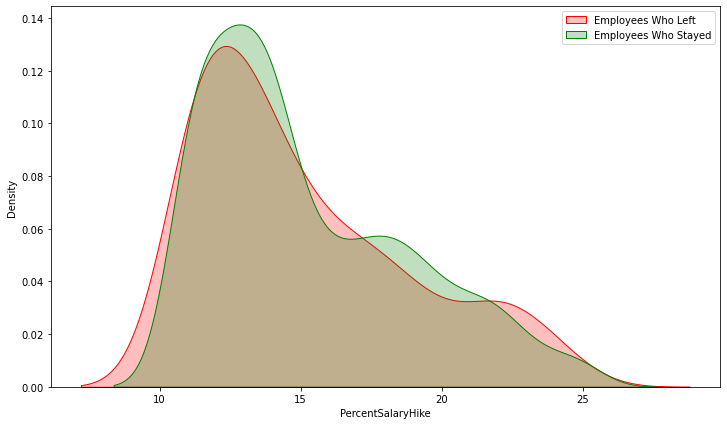

In [83]:
#PercentSalaryHike
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['PercentSalaryHike'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['PercentSalaryHike'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [84]:
#PercentSalaryHike doesn't seem to be a good indicator of attrition

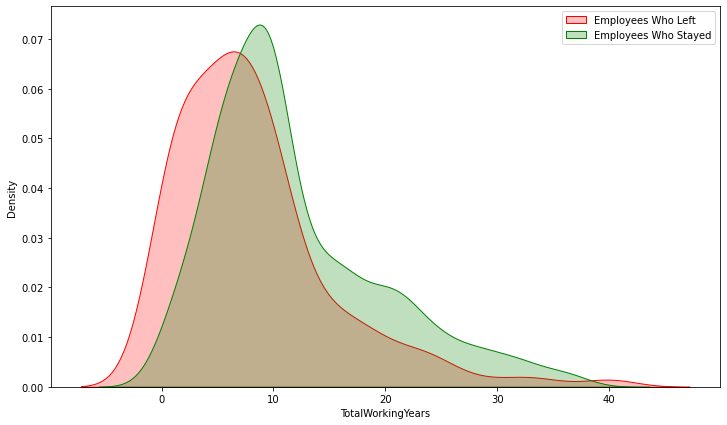

In [85]:
#TotalWorkingYears
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [86]:
# As Total working years increases the number of people stayed tend to be higher compared to the no. of people who left uptil 40
#years. After 40 years people leaving are more.This might be due to retirement.

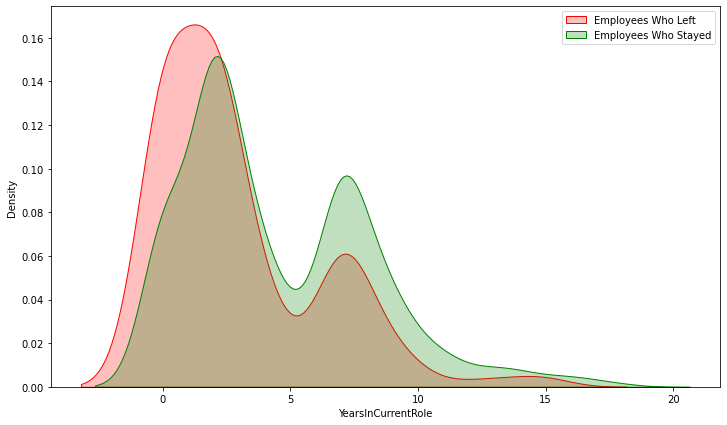

In [87]:
#YearsInCurrentRole
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsInCurrentRole'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['YearsInCurrentRole'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [88]:
#Employees who stay longer in the current role tend to stay.

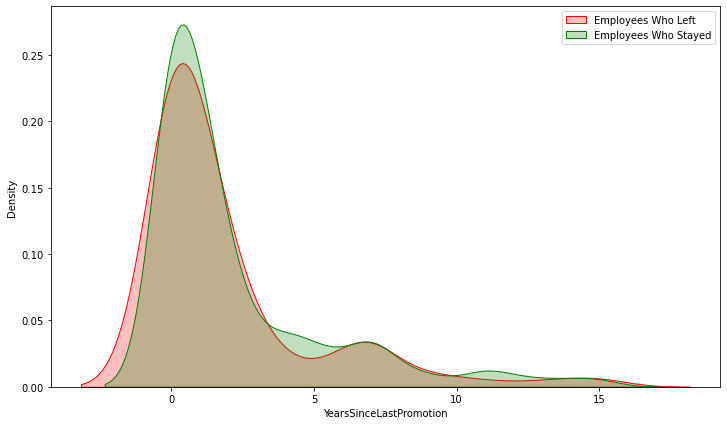

In [89]:
#YearsSinceLastPromotion
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsSinceLastPromotion'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['YearsSinceLastPromotion'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [90]:
#YearsSinceLastPromotion doesn't seem to be a good indicator of attrition

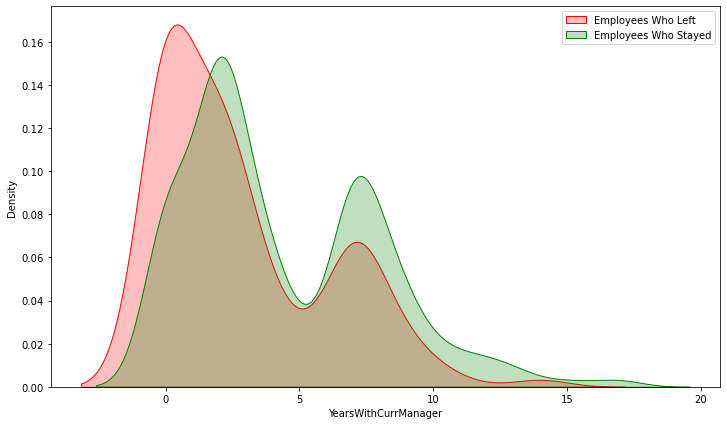

In [91]:
#YearsWithCurrManager
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label='Employees Who Left', shade=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employees Who Stayed', shade=True, color='g')
plt.legend()

In [92]:
#As Years with the current manager increases the number of people stayed tend to be higher compared to the no. of people who left.

# Machine Learning

In [93]:
#view our dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [94]:
#view categorical and numerical features of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [95]:
#For machine learning we need all the columns represented as numeric.
#So we need to convert categorical columns into numeric ones.
#Also lets create input dataframe (Excluding the target variable-Attrition)

In [96]:
X_cat=df[['BusinessTravel', 'Department','EducationField','Gender','JobRole','MaritalStatus']]

In [97]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


## One Hot Encoding

In [98]:
#To transform cat variables to numeric ones
from sklearn.preprocessing import OneHotEncoder
#object from class
onehotencoder=OneHotEncoder()
X_cat=onehotencoder.fit_transform(X_cat).toarray()

In [99]:
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [100]:
X_cat.shape

(1470, 26)

In [101]:
#now convert it into a dataframe
X_cat = pd.DataFrame(X_cat)

In [102]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [103]:
# note that we dropped the target 'Atrittion' as we want to create input dataframe
X_numerical = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [104]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [105]:
X_all.shape

(1470, 50)

In [106]:
#Let's scale the data to make sure that all the different features have the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [107]:
X
#X is input to the model

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [108]:
#create output to the model
y=df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [109]:
print(X.shape)
print(y.shape)

(1470, 50)
(1470,)


# Logistic Regression

In [110]:
#Logistic regression is used to predict binary outputs with two possible values labelled 0 or 1
#Logistic model output can be one of two classes: pass/fail, win/lose, healthy/sick
#In our case we want to know if the employee will stay or quit the company so I have chosen Logistic Regression for the analysis

In [111]:
#First we need to split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [112]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1102, 50)
(1102,)
(368, 50)
(368,)


In [113]:
#Now let train our model
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [114]:
#model is now trained

In [115]:
#Take the trained model and give it X_test data to predict the y(Attrition 1 or 0)
y_pred=model.predict(X_test)

In [116]:
y_pred
#1-employees who left, 0-employees who stayed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [117]:
#Lets check accuracy of our model by comparing the predicted values (y_pred) with the actual values in y_test
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print(f'Accuracy of our model is {accuracy*100}%')

Accuracy of our model is 89.40217391304348%


In [118]:
#Is Logistic Regression Machine Learning Method a better fit for our analysis?

In [119]:
#Lets find out 

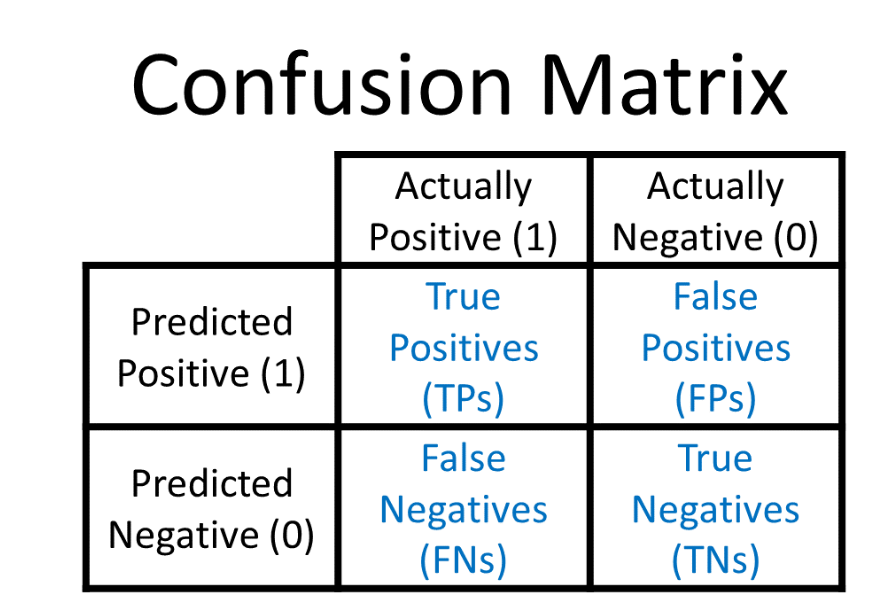

<AxesSubplot:>

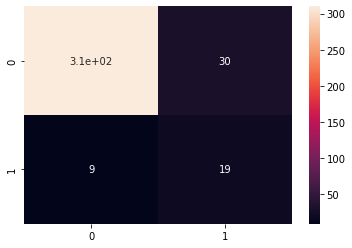

In [120]:
# Testing Set Performance
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       319
           1       0.68      0.39      0.49        49

    accuracy                           0.89       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.89      0.88       368



In [125]:
#Lets try XGboost algorithm instead of Logistic Regression
from xgboost import XGBClassifier

model2 = XGBClassifier(use_label_encoder=False)
model2.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

In [129]:
accuracy=accuracy_score(y_pred2, y_test)
print(f'Accuracy of our model is {accuracy*100}%')

Accuracy of our model is 86.95652173913044%


<AxesSubplot:>

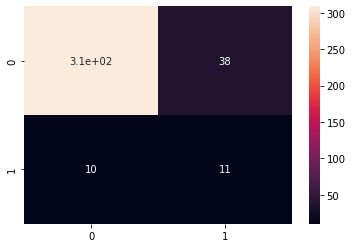

In [130]:
# Testing Set Performance
cm2 = confusion_matrix(y_pred2, y_test)
sns.heatmap(cm2, annot=True)

In [127]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       319
           1       0.52      0.22      0.31        49

    accuracy                           0.87       368
   macro avg       0.71      0.60      0.62       368
weighted avg       0.84      0.87      0.85       368



In [128]:
#no. of samples misclassified(upper right and lower left) by XGboost algorithm are slightly more than those of Logistic Regression algorithm.
#This indicates that the Logistic Regression Classifier Model is better than XGboost algorithm

# All Insights Compiled

In [131]:
# Frequency of 'DistanceFromHome' is more when the distance is shorter
#'Monthly income' is tail heavy at less monthly income
#'TotalWorking Years' is tail heavy at less total working years
#'YearsAt Company' is tail heavy at less years at the company
# 'age': mean age of the employees who stayed(38) is higher compared to who left(34)
# 'DailyRate': mean Rate of employees who stayed(812.50) is higher than who left(750.36)
# 'DistanceFromHome': Employees who stayed(8.91) live closer to home than employees who left(10.63)
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs(2.7,2.7)compared to (2.5,2.4)
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level(0.84) compared to (0.52)
#Strong correlation is observed between 'Monthlyincome' and 'JobLevel'
#Good positive correlation is observed between 'Joblevel' and 'TotalWorkingYears'
#Good positive correlation is observed between 'MonthlyIncome' and 'TotalWorkingYears'
#Good positive correlation is observed between 'PercentSalaryHike' and 'PerformanceRating'
#Good positive correlation is observed between 'YearsAtCompany' and 'YearsInCurrentRole'
#Good positive correlation is observed between 'YearsAtCompany' and 'YearsWithCurrManager'
#Good positive correlation is observed between 'YearsWithCurrManager' and 'YearsInCurrentRole'
#Frequent business travel could be the reason for attrition
# Department doesn't seem to be a strong indicator for attrition
# Education doesn't seem to be a strong indicator for attrition
# Education field doesn't seem to be a strong indicator for attrition
#Employees least satisfied with their environment show more attrition rate
# Gender doesn't seem to be a strong indicator for attrition
#Employees with the least Job Involvement show more attrition rate
#Employees with the least Job Level show more attrition rate
#Sales Representatives show a higher attrition rate
#Employees with the least Job Satisfaction show more attrition rate
#Single employees tend to have a greater attrition rate
#Employees who work OverTime tend to have highere attrition rate
# PerformanceRating doesn't seem to be a strong indicator for attrition
#Employees with the least RelationshipSatisfaction show sightly more attrition rate
#Employees with least and more stock option level tend to have a greater attrition rate
#TrainingTimesLastYear doesn't seem to be a strong indicator of attrition
#Employees with the least work life balance show the highest attrition rate
#Employees in the role of Research Director and Manager have higher Monthly income as compared to others.
# As age increases the number of people left tend to be lower compared to the no. of people who stayed.
# As distance from home increases the number of people left tend to be higher compared to the no. of people who stayed.
# As Monthly Income increases the number of people left tend to be lower compared to the no. of people who stayed.
# As num of companies worked are higher, higher is the attrition rate
#PercentSalaryHike doesn't seem to be a good indicator of attrition
# As Total working years increases the number of people stayed tend to be higher compared to the no. of people who left uptil 40
#years. After 40 years people leaving are more.This might be due to retirement.
#Employees who stay longer in the current role tend to stay.
#YearsSinceLastPromotion doesn't seem to be a good indicator of attrition
#As Years with the current manager increases the number of people stayed tend to be higher compared to the no. of people who left.
#no. of samples misclassified(upper right and lower left) by XGboost algorithm are slightly more than those of Logistic Regression algorithm.
#This indicates that the Logistic Regression Classifier Model is better than XGboost algorithm


# Key Data Insights

Hiring and re-training employees is expensive and time consuming.

It would be great if we get to know the reasons why employees are more likely to leave the company so that companies can work on it.

It would also be helpful to predict which employees are likely to leave based on the different features so that companies are more prepared.

I did dataanalysis to analyse the reasons for employee and attrition and machine learning using Logistic Regression and Xgboost to predict which employees are more likely to quit based on the different features.

The steps involved were:
1. Importing libraries
2. Importing Data
3. Data Cleaning
4. Exploratory Data Analysis
5. Data Visualisation
6. Drawing Conclusions based on our analysis
7. Create Input and Output Dataset (Convery Cat variables to numeric using One Hot Encoder)
8. Scaling the Data
9. Splitting training and testing data
10. Predictions
11. Checking Accuracy
12. Compare Models(Logistic Regression and Xgboost) using Confusion Matrix

Data Insights:
1. Mean Age, Daily Rate, EnvironmentSatisfaction, JobSatisfaction,StockOptionLevel of employees who stayed was observed to be higher than those who left.
2. Distance from home of employees who stayed was observed to be shorter than those who left.
3. Frequent business travel could be the reason for attrition
4. Employees with the least Job Involvement, Job Level, RelationshipSatisfaction, work life balance show more attrition rate
5. Sales Representatives, Single employees, Employees who work overtime, employees worked in many companies show a higher attrition rate.
6. As Monthly Income increases the number of people left tend to be lower compared to the no. of people who stayed.
7. As Total working years increases the number of people stayed tend to be higher compared to the no. of people who left uptil 40 years. After 40 years people leaving are more.This might be due to retirement.
8. Employees who stay longer in the current role tend to stay.
9. As Years with the current manager increases the number of people stayed tend to be higher compared to the no. of people who left.

Recommendations:
1. Survey can be conducted to find and provide better EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction, WorkLifeBalance for the employees.
2. Keep moderate business travel ,JobInvolvement and minimum Overtime
3. Schedule a meeting with Sales Representatives to find the challenged faced by them.
4. Features such as age, marital status, NumCompaniesWorked, TotalWorkingYears should be used for study purpose only and not to make decisions for recruitment of employees as to maintain unbiased recruitment process.

Model Buiding Insights:
1. Both models -Logistic Regression and XGBoost showed good accuracy >80%.
2. No. of samples misclassified by XGboost algorithm are slightly more than those of Logistic Regression algorithm.
3. This indicates that the Logistic Regression Classifier Model is better than XGboost algorithm